# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi varietas kismis pada dataset "Raisin" menggunakan decision tree classifier

<b>Kelompok: 1 </b>

Anggota:
1. Bayu Tiadi Nurul Fajar - 1301223199
2. Helmi Efendi Lubis - 1301223338
3. Raihan Ferdinand Khairuazfa - 1301220273

In [29]:
#IMPORT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print("success")

success


In [30]:


class DecisionTreeClassifier:
    def __init__(self, max_depth=None,feature_names=None):
        self.max_depth = max_depth
        self.feature_names = feature_names

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes_ = np.unique(y)
        self.n_classes = len(self.classes_)
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Kriteria stop
        if (self.max_depth is not None and depth == self.max_depth) or num_classes == 1 or num_samples < 2:
            return {'class': max(set(y), key=y.tolist().count), 'leaf': True}

        # Pencarian split terbaik
        best_gini = np.inf
        best_split = None
        for feature_idx in range(num_features):
            for threshold in np.unique(X[:, feature_idx]):
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]

                left_gini = self._gini(y[left_indices])
                right_gini = self._gini(y[right_indices])
                gini = (len(left_indices) / num_samples) * left_gini + (len(right_indices) / num_samples) * right_gini

                if gini < best_gini:
                    best_gini = gini
                    best_split = {'feature_idx': feature_idx, 'threshold': threshold,
                                  'left_indices': left_indices, 'right_indices': right_indices}

        # Split secara rekursif
        if best_split is not None:
            left_tree = self._grow_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
            right_tree = self._grow_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)
            return {'feature_idx': best_split['feature_idx'], 'threshold': best_split['threshold'],
                    'left': left_tree, 'right': right_tree, 'leaf': False}
        else:
            return {'class': max(set(y), key=y.tolist().count), 'leaf': True}

    def _gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    #untuk visualisasi tree saja
    def plot_tree(self, node=None, depth=0, pos=None, ax=None, parent=None, decision=None):
        if node is None:
            node = self.tree
        if pos is None:
            pos = (0.5, 1)
        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 8))
            ax.set_axis_off()
        if parent is None:
            parent = (0.5, 1)

        if node['leaf']:
            label = f'class = {node["class"]}'
            ax.text(pos[0], pos[1], label, ha='center', va='center', bbox=dict(facecolor='lightgrey', edgecolor='black'))
        else:
            if self.feature_names:
                feature_name = self.feature_names[node["feature_idx"]]
            else:
                feature_name = f'X[{node["feature_idx"]}]'
            label = f'{feature_name} <= {node["threshold"]}'
            ax.text(pos[0], pos[1], label, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black'))

            # posisi node anak
            left_pos = (pos[0] - 0.5 / (2 ** depth), pos[1] - 0.2)
            right_pos = (pos[0] + 0.5 / (2 ** depth), pos[1] - 0.2)

            ax.plot([pos[0], left_pos[0]], [pos[1], left_pos[1]], 'k-')
            ax.plot([pos[0], right_pos[0]], [pos[1], right_pos[1]], 'k-')

            # rekursif untuk plot node kiri dan kanan
            self.plot_tree(node['left'], depth + 1, left_pos, ax, pos, 'Yes')
            self.plot_tree(node['right'], depth + 1, right_pos, ax, pos, 'No')

            # Yes atau no
            ax.text((pos[0] + left_pos[0]) / 2, (pos[1] + left_pos[1]) / 2, 'Yes', ha='center', va='center', color='green')
            ax.text((pos[0] + right_pos[0]) / 2, (pos[1] + right_pos[1]) / 2, 'No', ha='center', va='center', color='red')

        if depth == 0:
            plt.show()

    def predict(self, X):
        predictions = []
        for sample in X:
            node = self.tree
            while not node['leaf']:
                if sample[node['feature_idx']] <= node['threshold']:
                    node = node['left']
                else:
                    node = node['right']
            predictions.append(node['class'])
        return predictions


#### Pendahuluan


Dataset yang dipilih adalah dataset Raisin. Dataset Raisin berisi data  kismis Kecimen dan Besni yang ditanam di Turki diperoleh dengan CVS. Sebanyak 900 butir kismis digunakan, termasuk 450 butir dari kedua varietas. Masalah yang ingin diselesaikan adalah klasifikasi varietas kismis Kecimen atau Besni menggunakan decision tree. Berikut adalah fitur kismis dalam dataset:

    1.) Area: Memberikan jumlah piksel dalam batas kismis.

    2.) Perimeter: Mengukur lingkungan dengan menghitung jarak antara batas kismis dan piksel di sekitarnya.

    3.) MajorAxisLength: Memberikan panjang sumbu utama, yaitu garis terpanjang yang dapat digambar pada kismis.

    4.) MinorAxisLength: Memberikan panjang sumbu kecil, yaitu garis terpendek yang dapat digambar pada kismis.

    5.) Eccentricity: Memberikan ukuran eksentrisitas elips (0 sampai 1)

    6.) ConvexArea: Memberikan jumlah piksel dari cangkang cembung terkecil dari wilayah yang dibentuk oleh kismis.

    7.) Extent: Memberikan rasio wilayah yang dibentuk oleh kismis terhadap total piksel dalam kotak pembatas.

    8.) Class : Kismis Kecimen dan Besni. (Target)



Hal-hal sebelum tahap training dan testing:

* Cek bentuk data dan missing value (tidak ada missing value)
*   EDA (berisi visualisasi data. Histogram untuk melihat distribusi data numerik, Barplot untuk melihar distribusi data non-numeric, Boxplot untuk melihat bentuk data dan mengecek outlier , Heatmap untuk melihat korelasi antar variabel numerik )
*   Cek dan remove data duplikat (tidak  ada)
*  Winsorization (mengganti nilai-nilai outlier agar tidak terlalu ekstrim)
* Splitting data (3/4 untuk training , 1/4 untu testing)






In [31]:
# Data
kismis_filepath=(r"C:\Users\hp\Documents\Jupyter\raisin\Raisin_Dataset\Raisin_Dataset\Raisin_Dataset.xlsx")
kismis_data = pd.read_excel(kismis_filepath)
kismis_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [32]:
#informasi tentang kolum data
kismis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [33]:
#informasi tentang kolum data object atau string
kismis_data.describe(include="object")

,Class
count,900
unique,2
top,Kecimen
freq,450


In [34]:
#informasi tentang kolum data numerik
kismis_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [35]:
missing_percent = kismis_data.isnull().mean().sort_values(ascending=False)*100
print("Missing Values In Columns:\n",round(missing_percent,2))
#TIDAK ADA MISSING VALUE PADA DATA

Missing Values In Columns:
 Area               0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
Eccentricity       0.0
ConvexArea         0.0
Extent             0.0
Perimeter          0.0
Class              0.0
dtype: float64


In [36]:
#template histogram dan barplot , histogram untuk numerikal , barplot untuk objek

color = '#9314ca'

def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)


    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()


def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

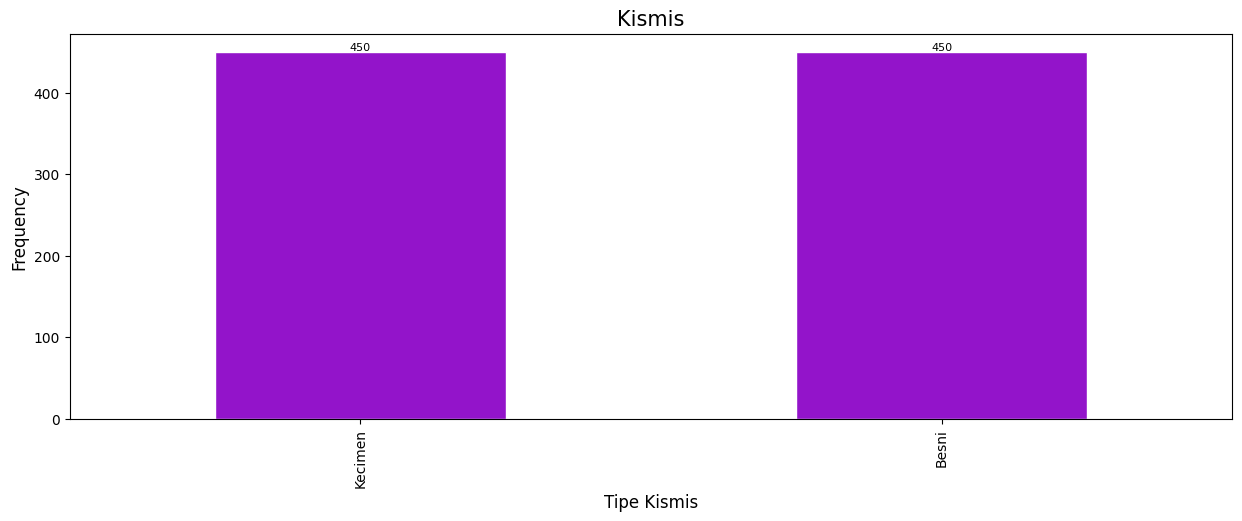

In [37]:
plot_bar(kismis_data['Class'], 'Kismis', 'Tipe Kismis')

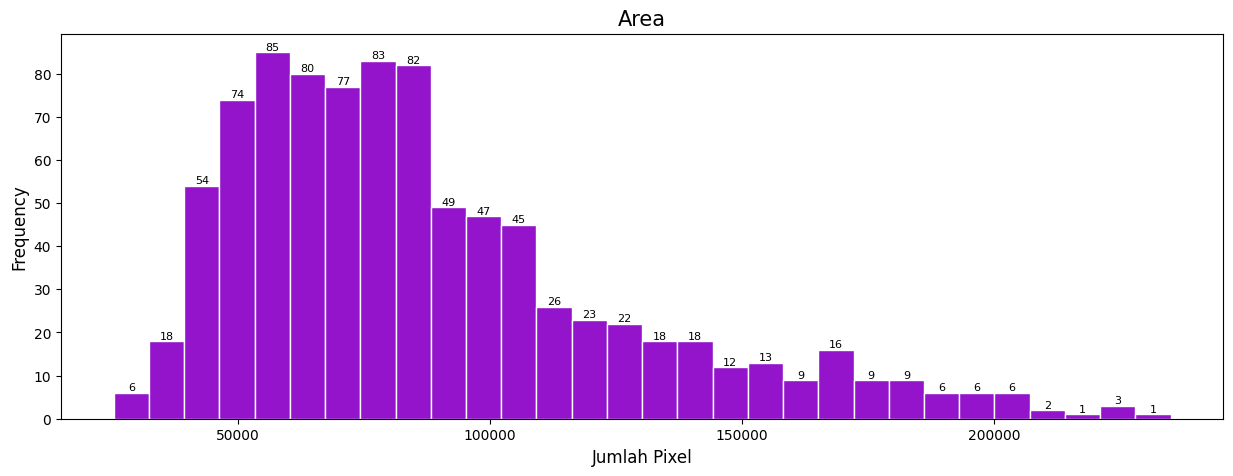

In [38]:
plot_hist(kismis_data['Area'], bins=30, title='Area', xlabel='Jumlah Pixel')

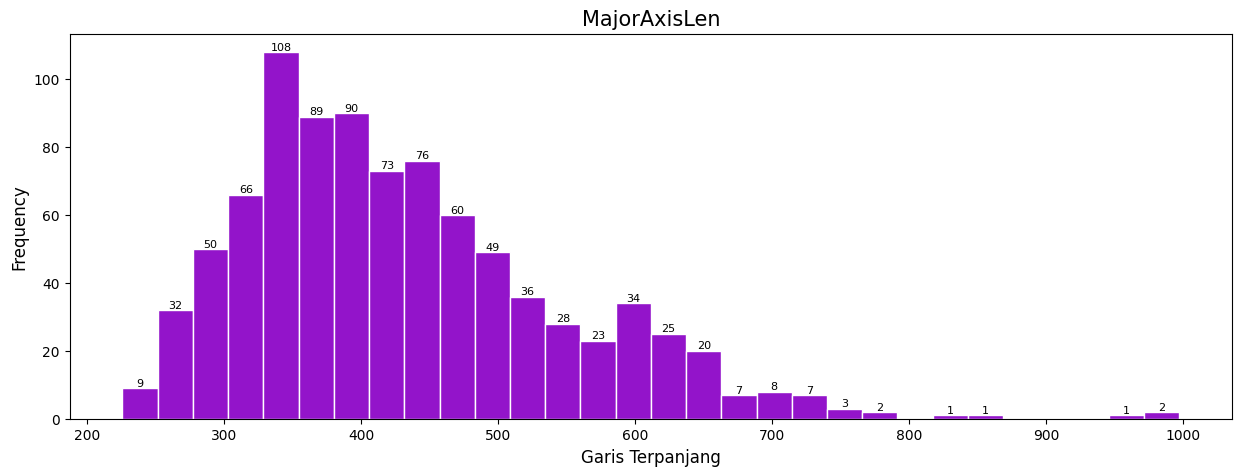

In [39]:
plot_hist(kismis_data['MajorAxisLength'], bins=30, title='MajorAxisLen', xlabel='Garis Terpanjang')

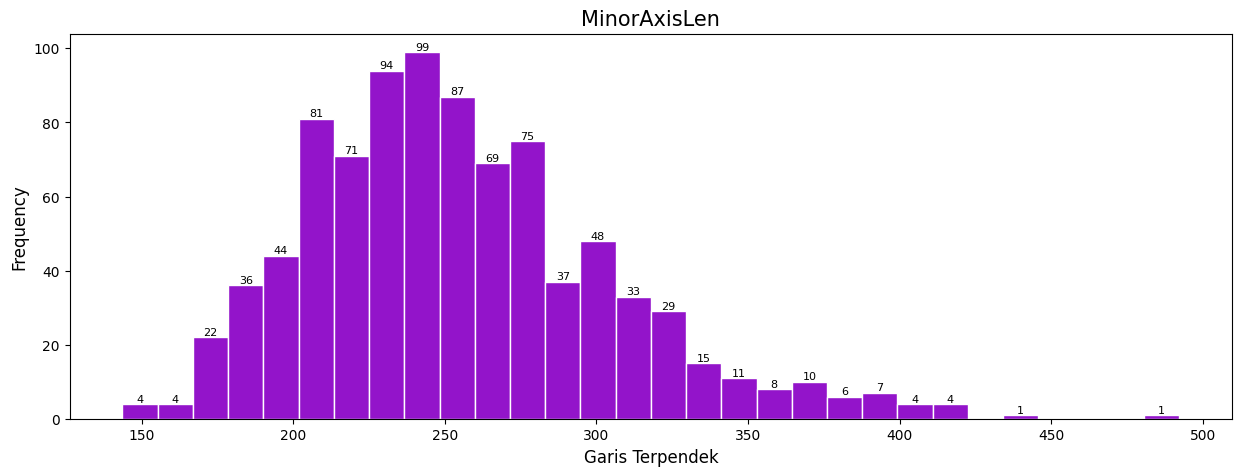

In [40]:
plot_hist(kismis_data['MinorAxisLength'], bins=30, title='MinorAxisLen', xlabel='Garis Terpendek')

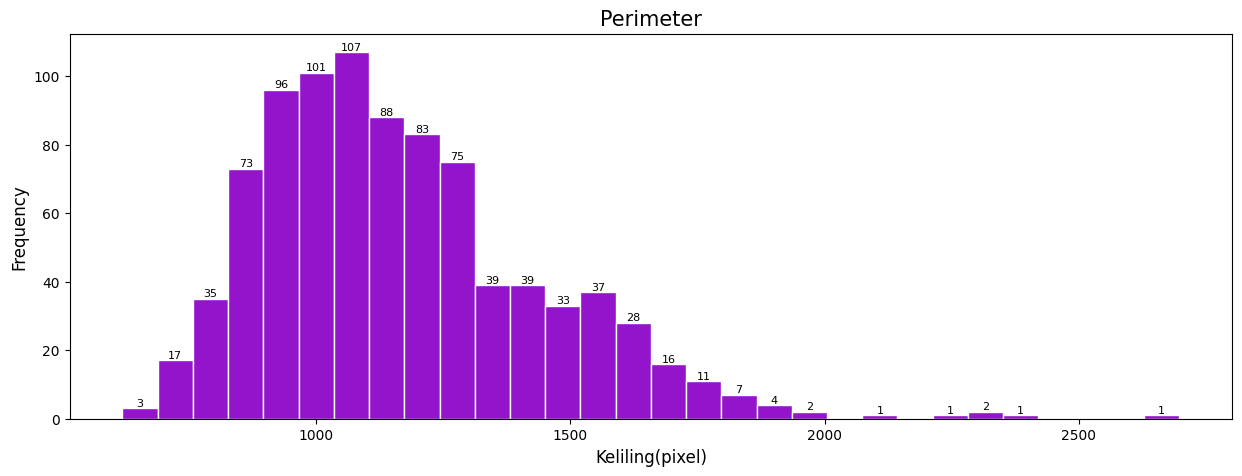

In [41]:
plot_hist(kismis_data['Perimeter'], bins=30, title='Perimeter', xlabel='Keliling(pixel)')

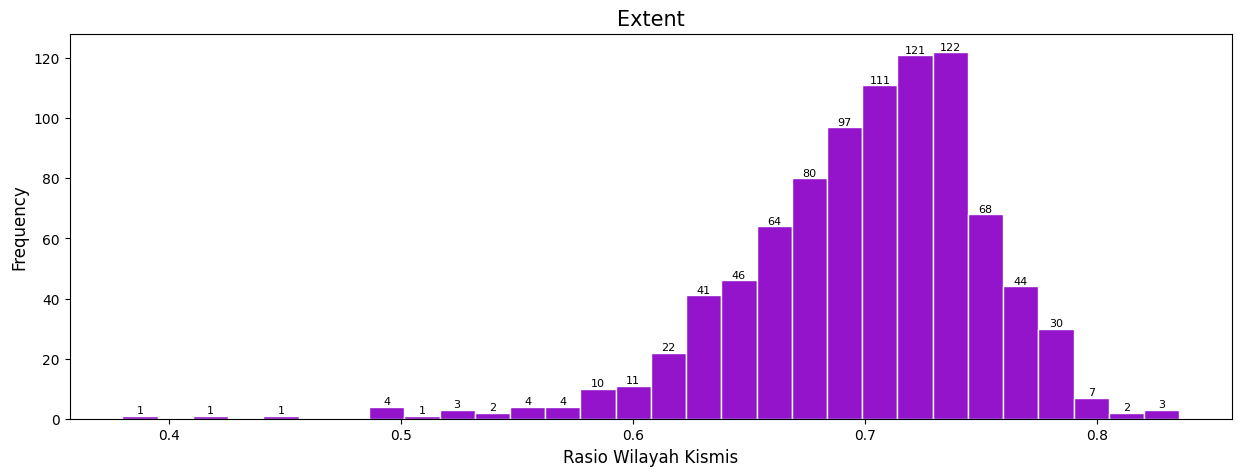

In [42]:
plot_hist(kismis_data['Extent'], bins=30, title='Extent', xlabel='Rasio Wilayah Kismis')

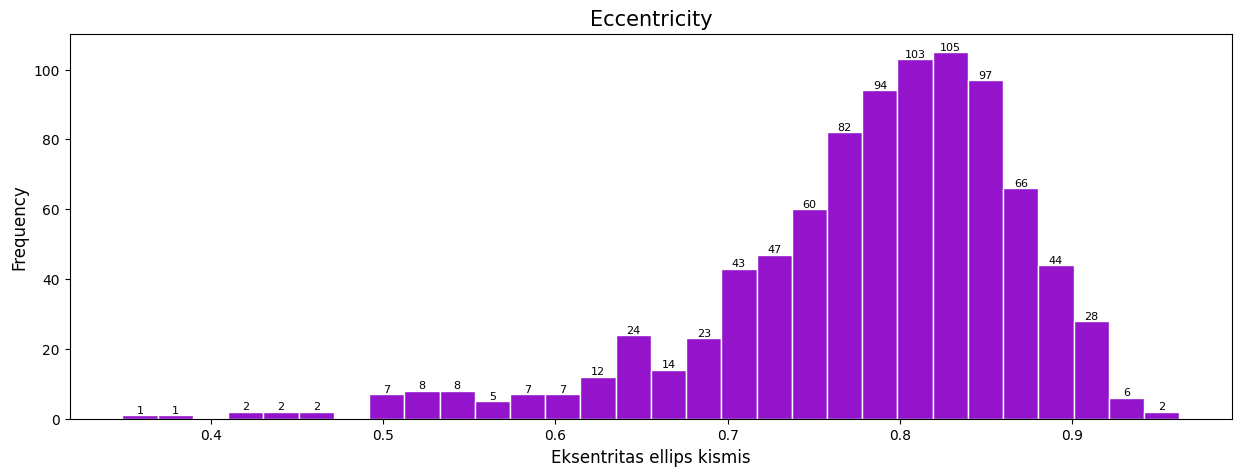

In [43]:
plot_hist(kismis_data['Eccentricity'], bins=30, title='Eccentricity', xlabel='Eksentritas ellips kismis')

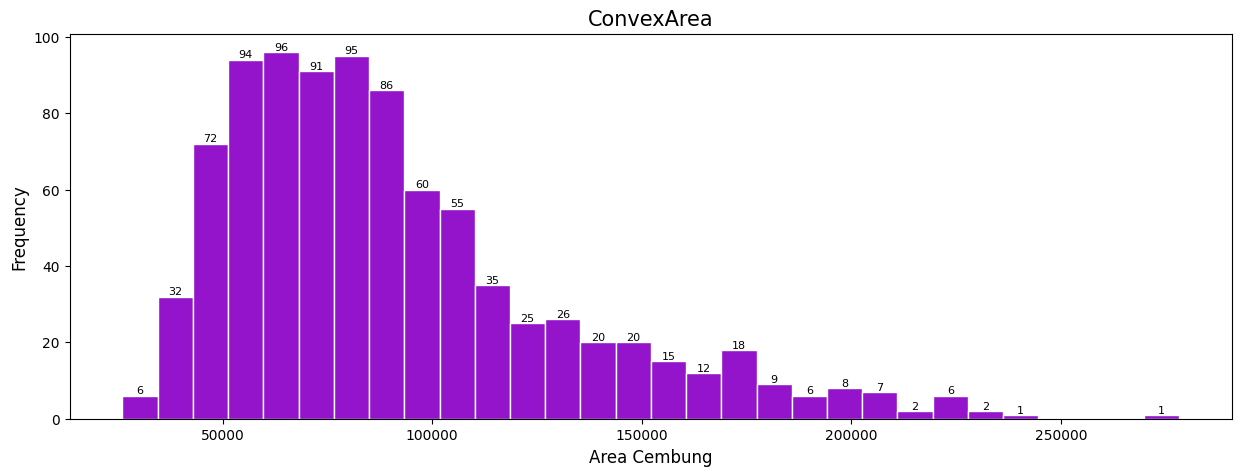

In [44]:
plot_hist(kismis_data['ConvexArea'], bins=30, title='ConvexArea', xlabel='Area Cembung')

                     Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
Area             1.000000         0.932774         0.906650      0.336107   
MajorAxisLength  0.932774         1.000000         0.728030      0.583608   
MinorAxisLength  0.906650         0.728030         1.000000     -0.027683   
Eccentricity     0.336107         0.583608        -0.027683      1.000000   
ConvexArea       0.995920         0.945031         0.895651      0.348210   
Extent          -0.013499        -0.203866         0.145322     -0.361061   
Perimeter        0.961352         0.977978         0.827417      0.447845   

                 ConvexArea    Extent  Perimeter  
Area               0.995920 -0.013499   0.961352  
MajorAxisLength    0.945031 -0.203866   0.977978  
MinorAxisLength    0.895651  0.145322   0.827417  
Eccentricity       0.348210 -0.361061   0.447845  
ConvexArea         1.000000 -0.054802   0.976612  
Extent            -0.054802  1.000000  -0.173449  
Perimeter          0.97661

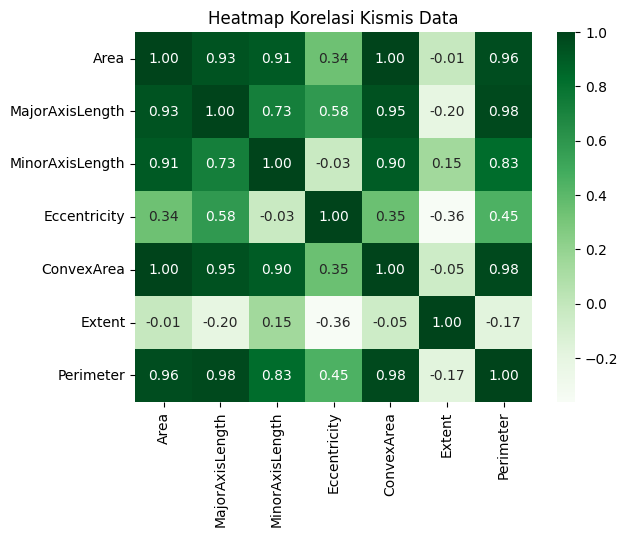

In [45]:
kismis_heat = kismis_data[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']].dropna()

# Menghitung matriks korelasi
c = kismis_heat.corr()
print(c)

# Membuat heatmap korelasi
sns.heatmap(c, annot=True, cmap='Greens', fmt='.2f')
plt.title('Heatmap Korelasi Kismis Data')
plt.show()

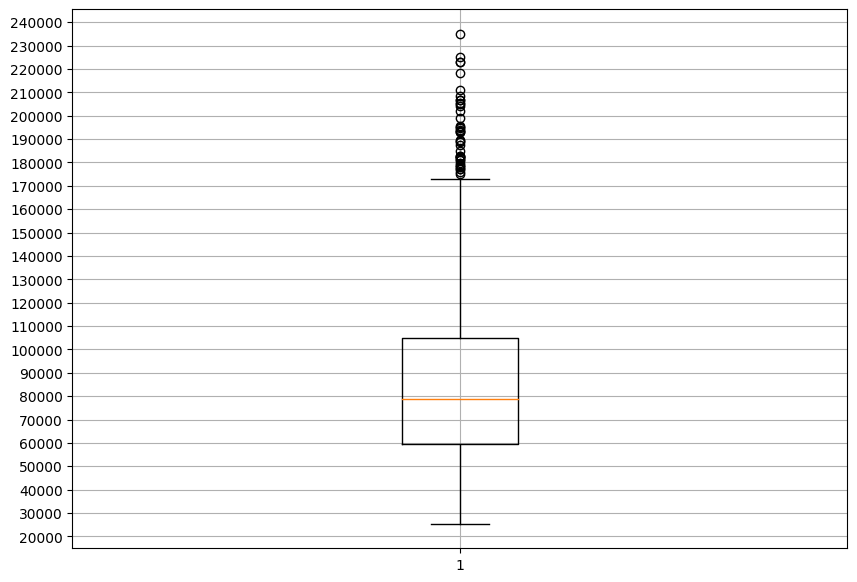

In [46]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize =(10, 7))

# Plot boxplot
plt.boxplot(kismis_data["Area"])
plt.gca().yaxis.set_major_locator(MultipleLocator(10000))

# Menampilkan plot
plt.grid()
plt.show()

<Axes: >

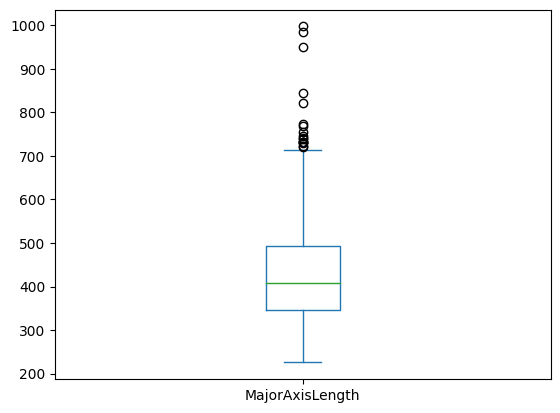

In [47]:
kismis_data["MajorAxisLength"].plot(kind="box")

<Axes: >

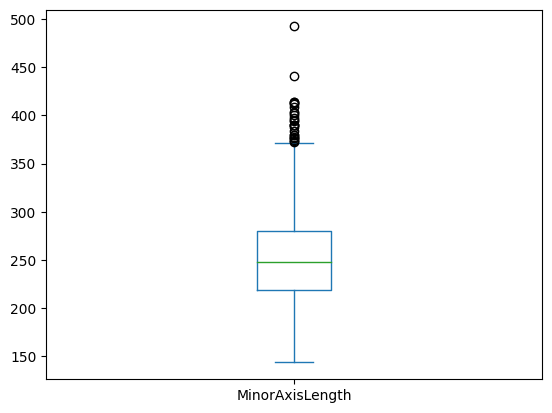

In [48]:
kismis_data["MinorAxisLength"].plot(kind="box")

<Axes: >

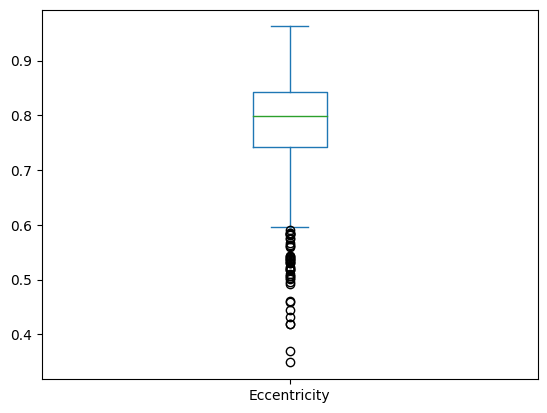

In [49]:
kismis_data["Eccentricity"].plot(kind="box")

<Axes: >

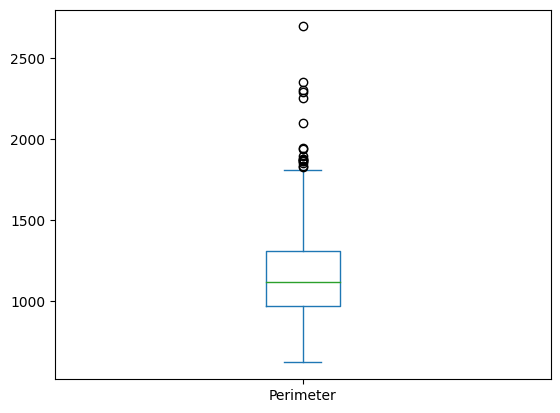

In [50]:
kismis_data["Perimeter"].plot(kind="box")

<Axes: >

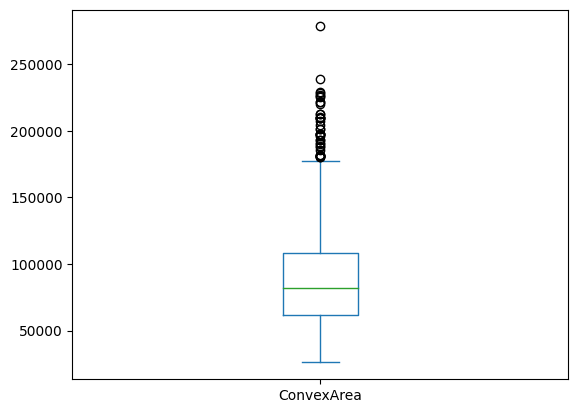

In [51]:
kismis_data["ConvexArea"].plot(kind="box")


<Axes: >

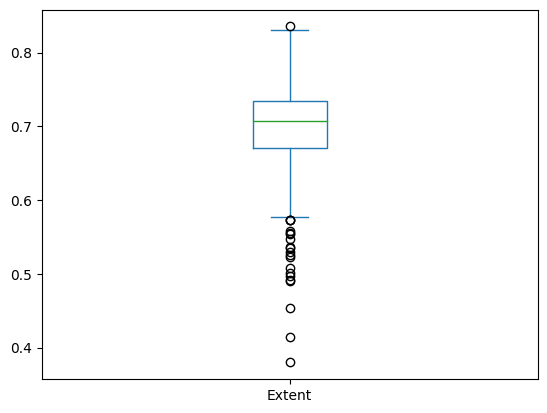

In [52]:
kismis_data["Extent"].plot(kind="box")


In [53]:
# Data Preprocessing

kismis_data = kismis_data.drop_duplicates()
print(len(kismis_data)) #tidak ada duplikat

900


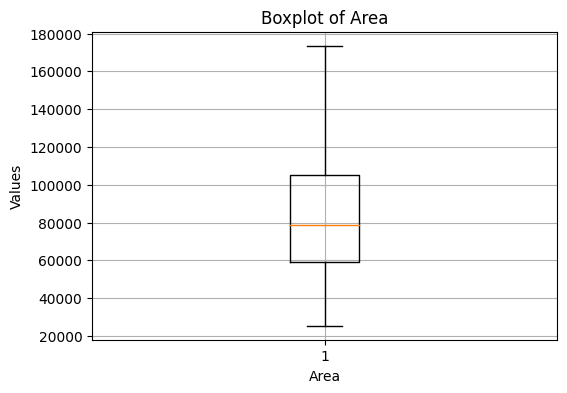

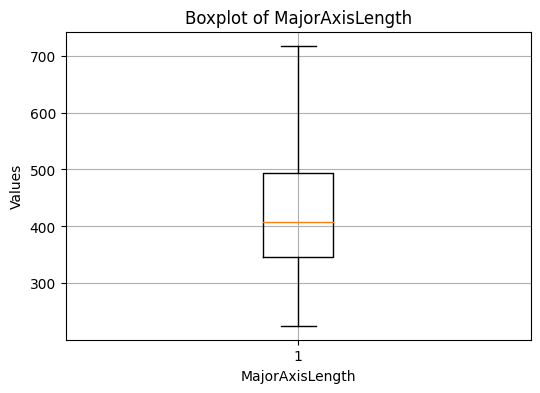

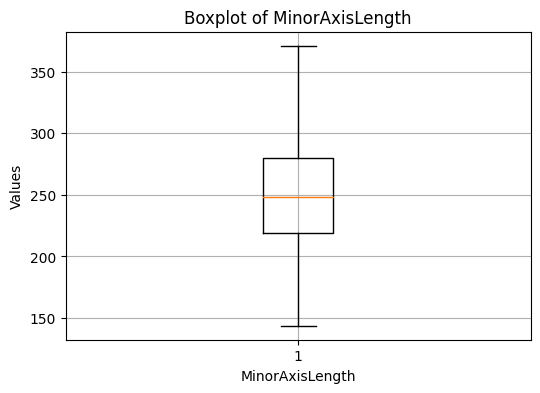

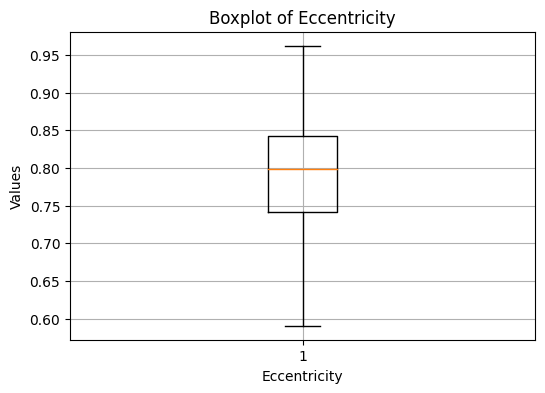

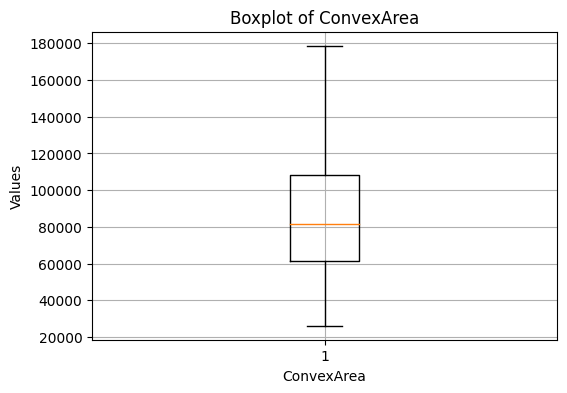

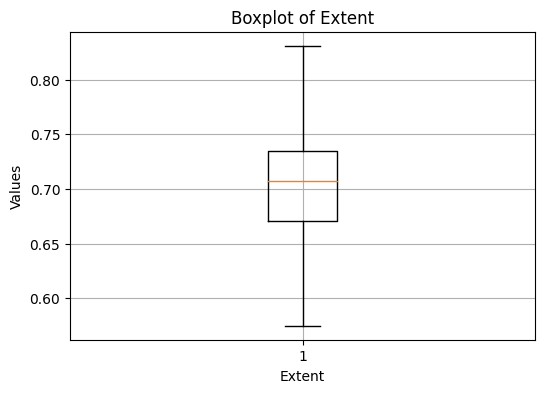

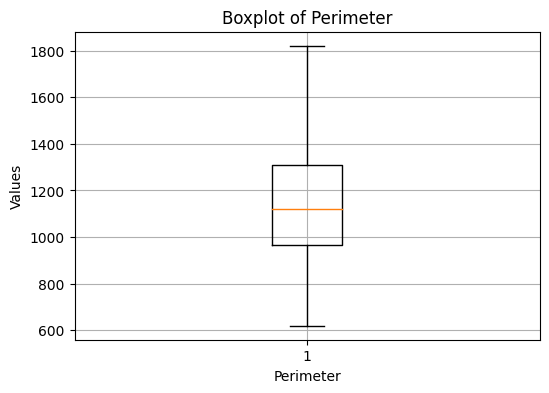

Jumlah baris setelah drop Outlier: 900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    float64
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    float64
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(7), object(1)
memory usage: 56.4+ KB


In [54]:
"""#Coba Pakai drop outlier(Untuk Akurasi Tinggi (Perlu analisis lebih lanjut))

kismis_data = kismis_data.drop(kismis_data[kismis_data['MinorAxisLength']>365].index)
kismis_data = kismis_data.drop(kismis_data[kismis_data['MajorAxisLength']>680].index)
kismis_data = kismis_data.drop(kismis_data[kismis_data['Perimeter']>1800].index)
#kismis_data = kismis_data.drop(kismis_data[kismis_data['Extent']<0.585].index)
kismis_data = kismis_data.drop(kismis_data[kismis_data['ConvexArea']>175000].index)
#kismis_data = kismis_data.drop(kismis_data[kismis_data['Eccentricity']<0.6].index)
kismis_data = kismis_data.drop(kismis_data[kismis_data['Area']>175000].index)
"""

# Coba pakai winsorization
for column in kismis_data.columns:
    if column == "Class":
        continue
    Q1 = kismis_data[column].quantile(0.25)
    Q3 = kismis_data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    kismis_data[column] = np.where(
        kismis_data[column] > upper,
        upper,
        np.where(
            kismis_data[column] < lower,
            lower,
            kismis_data[column]
        )
    )

#Boxplot setelah process outlier
for column in kismis_data.columns:
    if column == "Class":
        continue
    plt.figure(figsize=(6, 4))
    plt.boxplot(kismis_data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()
print("Jumlah baris setelah drop Outlier:", len(kismis_data))
kismis_data.info()


                     Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
Area             1.000000         0.947609         0.906408      0.370341   
MajorAxisLength  0.947609         1.000000         0.749917      0.615306   
MinorAxisLength  0.906408         0.749917         1.000000     -0.006465   
Eccentricity     0.370341         0.615306        -0.006465      1.000000   
ConvexArea       0.998895         0.951927         0.902568      0.379727   
Extent           0.012408        -0.127807         0.164214     -0.366027   
Perimeter        0.978590         0.978822         0.850168      0.474263   

                 ConvexArea    Extent  Perimeter  
Area               0.998895  0.012408   0.978590  
MajorAxisLength    0.951927 -0.127807   0.978822  
MinorAxisLength    0.902568  0.164214   0.850168  
Eccentricity       0.379727 -0.366027   0.474263  
ConvexArea         1.000000 -0.002290   0.983378  
Extent            -0.002290  1.000000  -0.090002  
Perimeter          0.98337

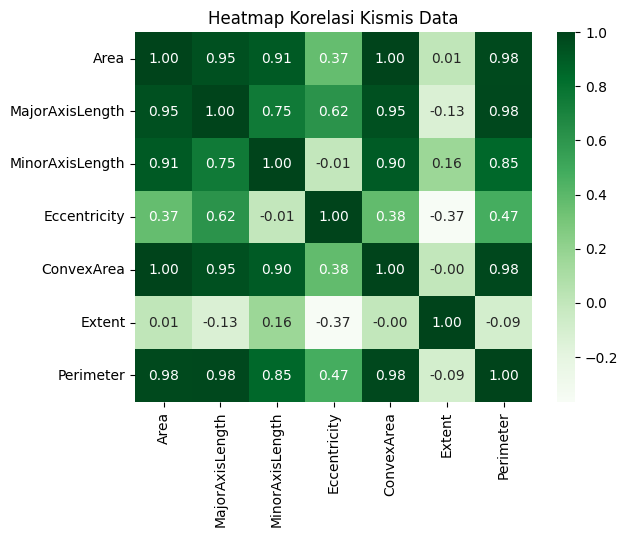

In [55]:
kismis_heat = kismis_data[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']].dropna()


# Menghitung matriks korelasi
c = kismis_heat.corr()
print(c)

# Membuat heatmap korelasi
sns.heatmap(c, annot=True, cmap='Greens', fmt='.2f')
plt.title('Heatmap Korelasi Kismis Data')
plt.show()

In [56]:
# Data Splitting
y = kismis_data.Class
features = ['Area','MajorAxisLength','MinorAxisLength','Eccentricity','Extent'	,'Perimeter']
X = kismis_data[features]

#banyak data hasil split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,test_size=0.25)
train_X = np.array(train_X)
val_X = np.array(val_X)
train_y = np.array(train_y)
val_y = np.array(val_y)

In [57]:
print("Banyak data training 0,75 * 900 = " ,len(train_X))
print("Banyak data testing 0,25 * 900 = " + str(len(val_y)))

Banyak data training 0,75 * 900 =  675
Banyak data testing 0,25 * 900 = 225


#### Metode yang Digunakan

Metode yang digunakan adalah decision tree classifier. Algoritma memulai dari akar pohon dan memilih fitur yang paling efektif dalam membagi data menjadi subset yang paling homogen. Efektivitas fitur ini biasanya diukur menggunakan metrik seperti Gini Impurity, Information Gain, atau Chi-square.
Pada setiap simpul (node), algoritma mencari titik pemisah (split point) terbaik yang memaksimalkan homogenitas dari data yang dipecah.
Proses ini diulang untuk setiap subset hingga memenuhi kriteria berhenti tertentu, seperti kedalaman maksimum pohon, jumlah minimum sampel di setiap daun, atau tidak ada peningkatan signifikan dalam homogenitas setelah pemisahan.

Parameter yang ditentukan adalah tinggi pohon , dimana tinggi pohon berpengaruh ke kompleksitas dan akurasi decision tree , pohon yang memiliki terlalu banyak cabang akan rentan overfitting dan terlalu sedikit percabangan akan rentan underfitting. Pencarian tinggi terbaik pohon dilakukan dengan iterasi dari range 1-21

In [58]:
def get_accuracy(max_depth, train_X, val_X, train_y, val_y):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(train_X, train_y)
    predictions = clf.predict(val_X)
    accuracy = np.sum(predictions == val_y) / len(val_y)
    return accuracy

# Kandidat max_depth (1-21)
candidate_max_depth = range(1, 21)
# Pencarian max_depth terbaik
best_accuracy = 0
best_depth = 1
for depth in candidate_max_depth:
    current_accuracy = get_accuracy(depth, train_X, val_X, train_y, val_y)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_depth = depth

# simpan hasilnya
best_tree_depth = best_depth
print(f"Best max_depth: {best_tree_depth} with accuracy: {best_accuracy}")

Best max_depth: 3 with accuracy: 0.8933333333333333


In [59]:
# Model Training
kismis_model = DecisionTreeClassifier(max_depth=best_tree_depth,feature_names=features)
kismis_model.fit(train_X,train_y)

#### Hasil dan Analisis


Berdasarkan classification report dan confusion matrix dapat dilihat bahwa akurasi akhir model adalah 0.89 atau lebih lengkapnya pada tabel dan grafik dibawah ini.


### Definisi Nilai:

- **True Positives (TP)**: 102
- **True Negatives (TN)**: 99
- **False Positives (FP)**: 13
- **False Negatives (FN)**: 11

###Perhitungan Metrik Kinerja
- $$accuracy(y, \hat{y})=\frac{1}{n_{samples}}\sum_{i=0}^{n_{samples-1}}1(\hat{y}_{i}=y_{i})$$
- $$precision=\frac{TP}{(TP+FP)}$$
- $$recall=\frac{TP}{TP + FN}$$
- $$\text{f1-score}=2*\frac{precision * recall}{precision + recall}$$



Metrik-metrik ini menunjukkan bahwa model ini bekerja dengan cukup baik dalam membedakan antara varietas kismis Besni dan Kecimen, dengan tingkat akurasi yang tinggi dan presisi serta recall yang seimbang untuk kedua kelas.

In [64]:
# Model Testing and Evaluation
prediksi = kismis_model.predict(val_X)

# Performa model pada data testing
print(classification_report(val_y,prediksi))

              precision    recall  f1-score   support

       Besni       0.90      0.89      0.89       115
     Kecimen       0.88      0.90      0.89       110

    accuracy                           0.89       225
   macro avg       0.89      0.89      0.89       225
weighted avg       0.89      0.89      0.89       225



In [61]:
# Cek akurasi Training data
prediksi_train = kismis_model.predict(train_X)

#cek performa pada training data
print(classification_report(train_y,prediksi_train))

              precision    recall  f1-score   support

       Besni       0.89      0.86      0.88       335
     Kecimen       0.86      0.90      0.88       340

    accuracy                           0.88       675
   macro avg       0.88      0.88      0.88       675
weighted avg       0.88      0.88      0.88       675



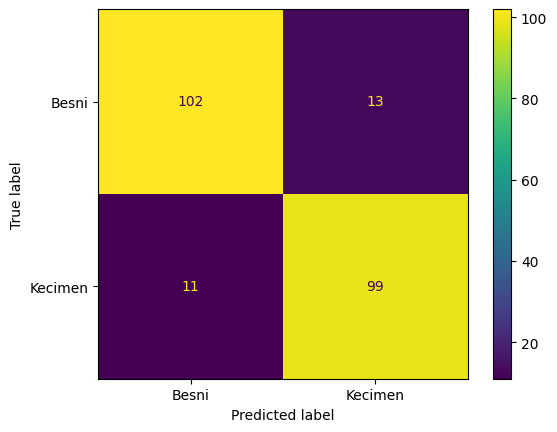

In [62]:
cm = confusion_matrix(val_y, prediksi, labels=kismis_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=kismis_model.classes_)
disp.plot()

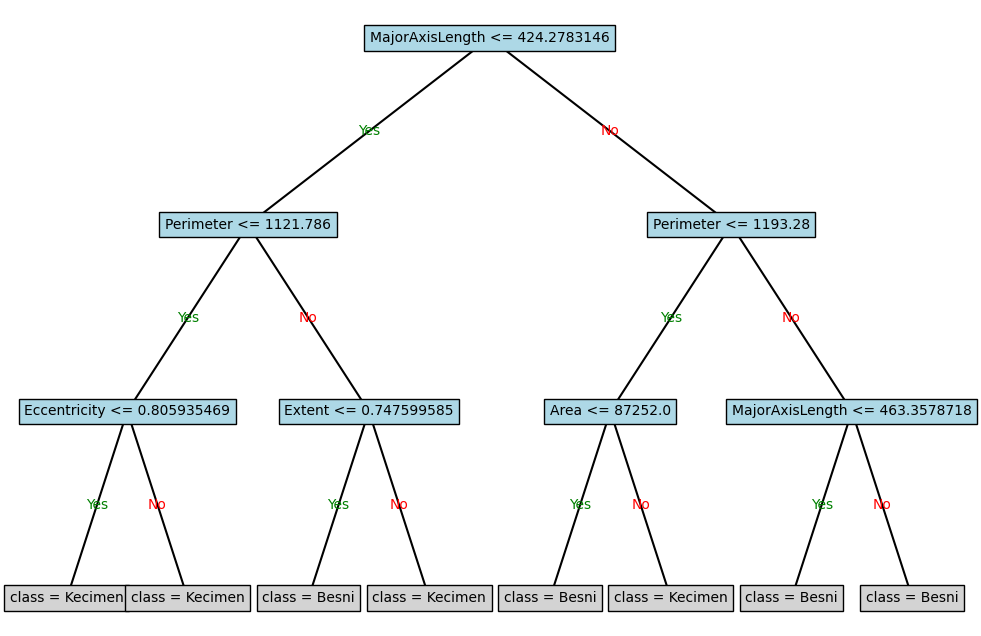

In [63]:
kismis_model.plot_tree()

###### Kesimpulan
Model klasifikasi decision tree secara efektif membedakan kedua varietas kismis dengan tingkat akurasi yang tinggi. Metode winsorization membantu mengelola outlier, memastikan pelatihan model yang kuat. Metrik presisi dan perolehan yang seimbang untuk kedua kelas menunjukkan bahwa model memiliki kinerja yang baik tanpa bias yang signifikan terhadap salah satu kelas. Keseluruhan proses menunjukkan penerapan teknik pembelajaran mesin secara menyeluruh, mulai dari preprocessing data dan EDA hingga pemilihan dan evaluasi model, sehingga menghasilkan model klasifikasi yang cukup bagus untuk klasifikasi kismis Kecimen dan Besni. Dalam rangka meningkatkan performa model, drop outlier fitur tertentu melainkan mengubah nilainya dan hanya menggunakan fitur yang nilai korelasi diantara fitur-fitur tersebut untuk training dapat meningkatkan akurasi model tapi butuh analisis lebih lanjut. Klasifikasi dengan cara lain juga disarankan dikarenakan teknik decision tree yang bisa dibilang cukup simple dibandingkan metode lain.
